In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import GAC_Shiny_helper



In [2]:
## create column info

names = ['carbonID', 'rad', 'epor', 'psdfr', 'rhop', 'rhof',   'L',    'wt',  'flrt', 'diam', 'tortu', 'influentID', 'effluentID', 'units', 'time', 'mass_mul', 'flow_type', 'flow_mult', 't_mult']
values = ['F400',  0.0513,  0.641,       5,  0.803,   0.62, 276.5, 9.072e6, 2146200,  304.8,       1,   'influent',       'F400',    'ug',  'day',        1.0,        'ml',        0.001,    1440]

column_info = pd.DataFrame(columns=['name', 'value'])
column_info['name'] = names
column_info['value'] = values
column_info_r = column_info.copy()

# column_info = pd.DataFrame(values, index=pd.Index(names, name='name'), columns=['value'])

column_info

,name,value
0,carbonID,F400
1,rad,0.0513
2,epor,0.641
3,psdfr,5
4,rhop,0.803
5,rhof,0.62
6,L,276.5
7,wt,9072000.0
8,flrt,2146200
9,diam,304.8


In [3]:
## create k_data
k_data = pd.DataFrame([5026.04, 0.43, 1, 200, 50000], index=['K','1/n', 'q','brk', 'AveC'], columns=['Trichloroethylene'])


## set up fouling
water_type = 'Rhine'
chem_type = 'halogenated alkanes'

## create chem_prop

chem_prop = pd.DataFrame([131.39, 102, 1.53], index=['MW','MolarVol', 'Density'], columns=['Trichloroethylene'])


            Trichloroethylene
0.000000             0.000000
0.087544             0.000000
0.175088             0.000000
0.262631             0.000000
0.350175             0.000000
...                       ...
174.649825         952.368648
174.737369         952.857844
174.824912         953.347041
174.912456         953.836238
175.000000         954.325434

[2000 rows x 1 columns]


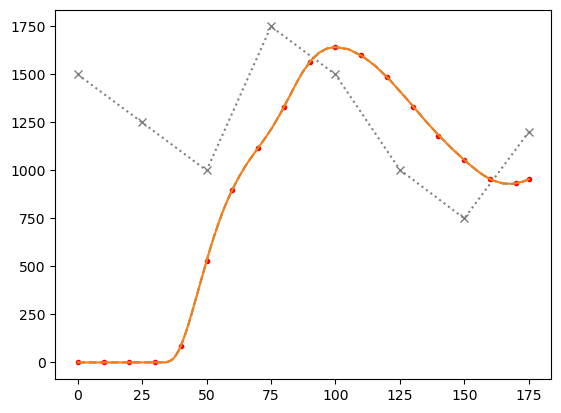

In [4]:
## create raw_data
influent_times = np.arange(0, 176, 25)
influent_data = np.array([1500, 1250, 1000, 1750, 1500, 1004, 750, 1200])

effluent_times = np.array(list(np.arange(0, 176, 10))+[175])
effluent_data = np.array([   0,    0,    0,    0,   87,  530, 900, 1117, 1331, 1564, 1643, 1601, 1486, 1333, 1182, 1055, 955, 933, 955])

# times = np.sort(np.array(list(set(list(influent_times)+list(effluent_times)))))
times = np.arange(0, 176, 1)
# print(times)

plt.plot(influent_times, influent_data, ls=':', marker='x', color='grey', label='Influent')
plt.plot(effluent_times, effluent_data, ls='None', marker='.', color='red', label='Effluent')

midx_tuple = [('influent', 'Trichloroethylene'), ('F400', 'Trichloroethylene')]
midx = pd.MultiIndex.from_tuples(midx_tuple)

raw_data = pd.DataFrame(index=times, columns=midx)
raw_data['influent'] = np.interp(times, influent_times, influent_data) ### this only works because there is only one compound
raw_data['F400'] = np.interp(times, effluent_times, effluent_data)
# print(raw_data)

# results_from_function = GAC_Shiny_helper.run_PSDM(column_info, chem_prop, k_data, inf_df, raw_data['F400'], 8, 12, water_type=water_type, chem_type=chem_type)


inf_df = pd.DataFrame(columns=['time', 'Trichloroethylene'])
inf_df['time'] = influent_times
inf_df['Trichloroethylene'] = influent_data

eff_df = pd.DataFrame(columns=['time','Trichloroethylene'])
eff_df['time'] = effluent_times
eff_df['Trichloroethylene'] = effluent_data
                      



results_from_function = GAC_Shiny_helper.run_PSDM(column_info, chem_prop, k_data, inf_df, eff_df, 8, 12, water_type=water_type, chem_type=chem_type)
plt.plot(results_from_function['time'].values, results_from_function['Trichloroethylene'].values, ls='--', label='From R helper')


## test running function directly
import sys
sys.path.append('c:/Users/jburkhar/OneDrive - Environmental Protection Agency (EPA)/Profile/Desktop/Git/Water_Treatment_Models/PSDM/')

import PSDM

column_info = pd.DataFrame(values, index=names, columns=['F400'])

column = PSDM.PSDM(column_info['F400'],
                   chem_prop,
                   raw_data,
                   k_data=k_data,
                   nr=8,
                   nz=12,
                   water_type=water_type,
                   chem_type=chem_type)

column.model_uncertainty(capacity='None')
print(column.results)

plt.plot(column.results.index,
         column.results.values,
         ls='-',
         label='Direct')


In [5]:
results_from_function

,Trichloroethylene,time
0.00,0.000000,0.00
0.25,0.000000,0.25
0.50,0.000000,0.50
0.75,0.049424,0.75
1.00,0.140026,1.00
...,...,...
174.00,948.737412,174.00
174.25,950.134417,174.25
174.50,951.531423,174.50
174.75,952.928429,174.75


In [10]:
## test run_PSDM_fitter (reuse data from above)

pm=30
xn=0.025

results_from_function = GAC_Shiny_helper.run_PSDM_fitter(column_info_r, chem_prop, k_data, inf_df, eff_df, 8, 12, water_type=water_type, chem_type=chem_type, pm=pm, xn=xn)



Running - Trichloroethylene


In [11]:
results_from_function

(        Trichloroethylene    time
 0.00             0.000000    0.00
 0.25             0.000000    0.25
 0.50             0.000000    0.50
 0.75             0.047577    0.75
 1.00             0.139342    1.00
 ...                   ...     ...
 174.00         950.719603  174.00
 174.25         951.735441  174.25
 174.50         952.751280  174.50
 174.75         953.767118  174.75
 175.00         954.782956  175.00
 
 [701 rows x 2 columns],
       Trichloroethylene
 K           5220.399477
 1/n            0.425000
 q          25402.219030
 brk           92.000000
 AveC        1362.580645)